# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Jacob Munoz

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday September 15th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from IPython.display import display
%matplotlib inline

### Problem 1 
***

An owner of a taxi company wants to estimate his fleet's average fuel economy over the next year in order to estimate the company's future fuel costs.  His fleet of taxis is made up of 100 Crown Victorias, 50 Toyota Priuses, and 50 Ford Escapes.  The owner randomly selects 12 vehicles from his vehicle registration rolls and tracks their fuel usage in miles per gallon over the next week.  So as to get a proper estimate, he intentionally selects 6 Crown Vics, 3 Priuses, and 3 Escapes to track. 

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

Population: All of the 200 cars
Sample Frame: 100 Crown Victorias, 50 Toyota Priuses, and 50 Ford Escapes
Sample: 6 crown Vics, 3 Priuses, 3 Escapes
Sample Type: Stratified Sampling
Quantity of Interest: Fuel Economy of Fleet

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ goes to inﬁnity. To illustrate this, consider the dataset

$$
4.6 \quad 
3.0 \quad 
3.2 \quad
4.2 \quad
5.0
$$

with sample mean $4$ and sample median $4.2$. 

**Part A**: We replace the element $3.2$ by some real number $y$. What happens with the sample mean and the sample median of this new dataset as $y \rightarrow \infty$?


As y goes to infinity the sample mean also goes to infinity, however the median will become 4.6 as soon as y is greater than 5.

**Part B**: We replace a number of elements by some real number $y$. How many elements do we need to replace so that the sample median of the new dataset goes to infinity as $y \rightarrow \infty$?

You would need to replace 3 elements so that infinity becomes the majority of the data set, having (x, x, infinity, infinty, infinty) would result in infinity being the median of the data set.

**Part C**: Suppose we have another data set of size $n$. How many elements do we need to replace by some real number $y$, so that the sample mean of the new dataset goes to infinity as $y \rightarrow \infty$? And how many elements do we need to replace, so that the sample median of the new dataset goes to infinity? 

For the sample mean to go to infinity, you only need one element(y) to go to infinity because it alone will pull the mean up with it. For the sample median to go to infinity you need (n/2)+1 elements to be y, that way the majority of the elements will go to infinity, similar to question 2B.

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


$$ \bar x_n = \frac{x_1 + x_2 + x_3 + ... + x_n}{n} $$
$$ $$
$$ = \frac{(x_1 + x_2 + x_3 + ... + x_{n-1})+x_n}{n} $$
$$ $$
$$ = \frac{(n-1)\bar x_{n-1} + x_n}{n} $$
$$ $$
$$ = \frac{n\bar x_{n-1}-\bar x_{n-1}+x_n}{n} $$ 
$$ $$
$$ = \bar x_{n-1} + \frac{x_n-\bar x_{n-1}}{n} $$


**Part B (Extra Credit)**: Show algebraically that the following relation holds between the variance of the first $n-1$  observations and the variance of all $n$ observations: 

$$
s^2_n = \frac{(n-2)}{(n-1)}s^2_{n-1} + \frac{(x_n - \bar{x}_{n-1})^2}{n}
$$

Meh

**Part C**: It turns out that in some scenarios the variance calculation in **Part B** can suffer from numerical instability (that is, due to round-off errors and finite precision arithmetic, the algorithm can return garbage).  A better method is to update the sum of squares term incrementally and then divide by $n-1$ at the end.  Define the sum of squares with $n$ observations as $
M_n = \sum_{k=1}^n (x_k - \bar{x}_n)^2$. We can then compute the sample variance as $s_n^2 = M_n/(n-1)$.

Show algebraically that the following relation holds between the sum of squares with $n-1$ observations and the sum of squares with all $n$ observations: 

$$
M_n = M_{n-1} + (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n)
$$

$$ M_n=\sum_{i=1}^n (x_i- \bar x_n)^2 $$
$$ $$
$$ =\sum_{i=1}^{n-1} (x_i - \bar x_n)^2+(x_n -\bar x_n)^2  $$
$$ $$
$$ =\sum_{i=1}^{n-1} \left(x_i-\bar x_n-\frac{x_n-\bar x_{n-1}}{n}\right)^2+(x_n-\bar x_n)^2 $$
$$ $$
$$ =\sum_{i=1}^{n-1}\left((x_i-\bar x_{n-1})^2+\left( \frac{x_n-\bar x_{n-1}}{n}\right)^2-2(x_i-\bar x_{n-1})\left( \frac{x_n-\bar x_{n-1}}{n}\right)\right)+(x_n-\bar x_n)^2 $$
$$ $$
$$ =\sum_{i=1}^{n-1}\left((x_i-\bar x_{n-1})^2\right)+\sum_{i=1}^{n-1}\left(\left(\frac{x_n-\bar x_{n-1}}{n}\right)^2\right)-2\left(\frac{x_n-\bar x_{n-1}}{n}\right)\sum_{i=1}^{n-1}((x_i-\bar x_{n-1}))+(x_n-\bar x_n)^2 $$
$$ $$
$$ = M_{n-1}+(n-1)\left(\frac{x_n-\bar x_{n-1}}{n}\right)^2-2\left(\frac{x_n-\bar x_{n-1}}{n}\right)*0+\left(x_n-\frac{(n-1)\bar x_{n-1}+x_n}{n}\right)^2 $$
$$ $$
$$ = M_{n-1}+\left(\frac{n-1}{n^2}\right)(x_n-\bar x_{n-1})^2+\left(\frac{n-1}{n}\right)^2(x_n-\bar x_{n-1})^2 $$
$$ $$
$$ = M_{n-1}+\frac{n-1}{n}(x_n-\bar x_{n-1})^2 $$
$$ $$
$$ M_n = M_{n-1}+(x_n-\bar x_{n-1})(x_n-\bar x_n)$$

For parts A/C I collaborated with Kelsey Adams and Andrew Fay

**Informative But Not Required**: Write a Python function that implements the online variance computation in **Part C** and  requires only one pass over the data. 

### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by class warfare; others claim it was characterized by male chivalry.  We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in titanic_data.csv and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [2]:
#Reads in the dirty data
in_file = 'titanic_data.csv'
titanic_data = pd.read_csv(in_file)

**Part A**: Explain in words what patterns you might see in the data if there were male chivalry in the final hours aboard the Titanic?  What patterns might you see if there were class warfare in the final hours?

If there was male chivalry I would expect to see the number of male survivors to be much less than that of women survivors. If there were a class warfare I would expect to see the opposite, a much larger number of male survivors.

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [3]:
#Removes entries with missing data in these columns
dfTitanic = titanic_data.dropna(subset=["Survived", "Pclass", "Age", "Sex"]).copy()

**Part C**: Determine the fraction of survivors from each passenger class. 

In [4]:
dfClass = dfTitanic['Pclass'].value_counts().reset_index()
dfClass.columns = ['class', 'count']
dfClass["percentage"] = (dfClass["count"] / len(dfTitanic))
display(dfClass)

,class,count,percentage
0,3,355,0.497199
1,1,186,0.260504
2,2,173,0.242297


First I made a new dataframe with only the classes and their counts. This allows me to easily use the data to divide the total counts and get the percentages of survivors from each class.

**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [5]:
#Sums up all the male and female survivors from each class
male_1_survived = dfTitanic.loc[(dfTitanic["Sex"] == 'male') & (dfTitanic["Pclass"] == 1), "Survived"].sum()
female_1_survived = dfTitanic.loc[(dfTitanic["Sex"]=='female') & (dfTitanic["Pclass"] == 1), "Survived"].sum()
male_2_survived = dfTitanic.loc[(dfTitanic["Sex"] == 'male') & (dfTitanic["Pclass"] == 2), "Survived"].sum()
female_2_survived = dfTitanic.loc[(dfTitanic["Sex"]=='female') & (dfTitanic["Pclass"] == 2), "Survived"].sum()
male_3_survived = dfTitanic.loc[(dfTitanic["Sex"] == 'male') & (dfTitanic["Pclass"] == 3), "Survived"].sum()
female_3_survived = dfTitanic.loc[(dfTitanic["Sex"]=='female') & (dfTitanic["Pclass"] == 3), "Survived"].sum()

#Sums up the total number of men and women in each class to compare to number of survivors
total_men_1 = len(dfTitanic.loc[(dfTitanic["Sex"] == 'male') & (dfTitanic["Pclass"] == 1)])
total_men_2 = len(dfTitanic.loc[(dfTitanic["Sex"] == 'male') & (dfTitanic["Pclass"] == 2)])
total_men_3 = len(dfTitanic.loc[(dfTitanic["Sex"] == 'male') & (dfTitanic["Pclass"] == 3)])
total_women_1 = len(dfTitanic.loc[(dfTitanic["Sex"] == 'female') & (dfTitanic["Pclass"] == 1)])
total_women_2 = len(dfTitanic.loc[(dfTitanic["Sex"] == 'female') & (dfTitanic["Pclass"] == 2)])
total_women_3 = len(dfTitanic.loc[(dfTitanic["Sex"] == 'female') & (dfTitanic["Pclass"] == 3)])


print("{}/{} men survived from class 1".format(male_1_survived, total_men_1))
print("{}/{} men survived from class 2".format(male_2_survived, total_men_2))
print("{}/{} men survived from class 3".format(male_2_survived, total_men_3))
print("{}/{} women survived from class 1".format(female_1_survived, total_women_1))
print("{}/{} women survived from class 2".format(female_2_survived, total_women_2))
print("{}/{} women survived from class 3".format(female_3_survived, total_women_3))

40/101 men survived from class 1
82/85 women survived from class 1
15/99 men survived from class 2
68/74 women survived from class 2
15/253 men survived from class 3
47/102 women survived from class 3


Women in third class had a higher survival rate but just barely.

**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

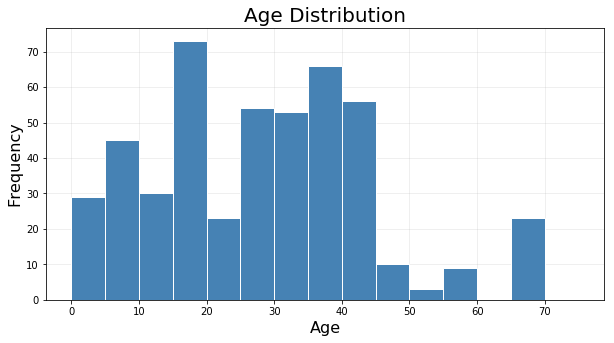

In [6]:
#Sets up the graph
my_bins = range(0, 80, 5)
fig, ax = plt.subplots(figsize=(10,5))

#Uses the age data from the data frame
dfTitanic.loc[dfTitanic["Age"]].hist(column = "Age", ax = ax, bins = my_bins, facecolor = "steelblue", edgecolor = "white")

#Title
ax.set_title("Age Distribution", fontsize = 20)
ax.set_xlabel("Age", fontsize = 16)
ax.set_ylabel("Frequency", fontsize = 16)

#Makes things more clear
ax.grid(alpha = 0.25)
ax.set_axisbelow(True)


I would say that the age distribution is bimodal because there seems to be a clear split right around 20-25 where most of the data lies to the left and right.

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [7]:
#Sums up total females survived, then calculates mean and median using total women survived
females_survived = dfTitanic.loc[(dfTitanic["Sex"]=='female') & (dfTitanic["Survived"] == 1)]
mean_age_survived = females_survived["Age"].sum() / len(females_survived)
median_age_survived = females_survived["Age"].median()

#Same as above but for not survived
females_not_survived = dfTitanic.loc[(dfTitanic["Sex"]=='female') & (dfTitanic["Survived"] == 0)]
mean_age_not_survived = females_not_survived["Age"].sum() / len(females_not_survived)
median_age_not_survived = females_not_survived["Age"].median()

print("{}: mean age survived".format(mean_age_survived))
print("{}: mean age not survived".format(mean_age_not_survived))
print("{}: median age survived".format(median_age_survived))
print("{}: median age not survived".format(median_age_not_survived))

28.84771573604061: mean age survived
25.046875: mean age not survived
28.0: median age survived
24.5: median age not survived


The mean and median age of women were both higher for women who survived.

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

The data suggests that there was undoubtly male chivalry. In every single passenger class the women had a higher survival rate than men and by quite a bit. For example in class 1 40/101 men survived while 82/85 women survived which is a staggering difference in percentages. In my opinion there really is no way that there was class warfare.

### Problem 5
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [8]:
#Reads in dirty data from website
web_path = 'https://www.stat.berkeley.edu/~statlabs/data/babies.data'
file_path = web_path 

df = pd.read_csv(file_path, delim_whitespace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
bwt          1236 non-null int64
gestation    1236 non-null int64
parity       1236 non-null int64
age          1236 non-null int64
height       1236 non-null int64
weight       1236 non-null int64
smoke        1236 non-null int64
dtypes: int64(7)
memory usage: 67.7 KB



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristic.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [9]:
#Removes all entries with missing data
dfBabies = df.loc[(df['bwt'] != 999) & (df['gestation'] != 999) & (df['weight'] != 999) & (df['height'] != 99) & (df['parity'] != 9) & (df['smoke'] != 9)]
dfBabies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 1235
Data columns (total 7 columns):
bwt          1175 non-null int64
gestation    1175 non-null int64
parity       1175 non-null int64
age          1175 non-null int64
height       1175 non-null int64
weight       1175 non-null int64
smoke        1175 non-null int64
dtypes: int64(7)
memory usage: 73.4 KB


Used .loc to locate all the rows without 9, 99, or 999 and put them into a new data frame.

**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

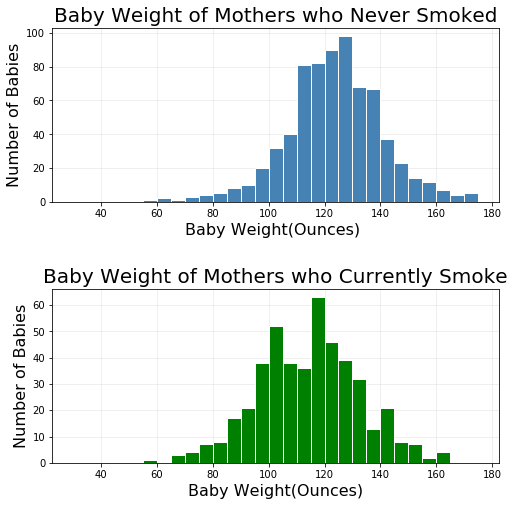

In [10]:
#Sets up graph
my_bins = range(30, 180, 5)
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (8,8))

#First graph is for mothers who don't smoke, using the baby weight data column
dfBabies.loc[dfBabies["smoke"] == 0].hist(column = "bwt", ax = axes[0], bins = my_bins, facecolor = "steelblue", edgecolor = "white")

#Sets labels
axes[0].set_title("Baby Weight of Mothers who Never Smoked", fontsize = 20)
axes[0].set_xlabel("Baby Weight(Ounces) ", fontsize = 16)
axes[0].set_ylabel("Number of Babies", fontsize = 16)

#Makes graph more visable
axes[0].grid(alpha = 0.25)
axes[0].set_axisbelow(True)

#Second graph is for mothers who smoke, using the baby weight data column
dfBabies.loc[dfBabies["smoke"] == 1].hist(column = "bwt", ax = axes[1], bins = my_bins, facecolor = "green", edgecolor = "white")

#Sets labels for second graph
axes[1].set_title("Baby Weight of Mothers who Currently Smoke", fontsize = 20)
axes[1].set_xlabel("Baby Weight(Ounces)", fontsize = 16)
axes[1].set_ylabel("Number of Babies", fontsize = 16)

#Makes graph more visable
axes[1].grid(alpha = 0.25)
axes[1].set_axisbelow(True)

fig.subplots_adjust(hspace=.5)

With the two graphs side by side you can clearly see that mothers who smoked on average had smaller babies, having the graphs be lined up makes the data easy to read and understand.

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

I would say that the data for both graphs is faily unimodal however the baby weight of mothers who smoke is slightly more negatively skewed than mothers who don't smoke.

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [11]:
#Gets the data for mothers who smoked and didn't into seperate tmp data frames
dfTemp = dfBabies.loc[dfBabies["smoke"] == 0]
dfTemp2 = dfBabies.loc[dfBabies["smoke"] == 1]

#Calculates the mean and medians
mean0 = dfTemp["bwt"].sum() / len(dfTemp)
mean1 = dfTemp2["bwt"].sum() / len(dfTemp2)
median0 = dfTemp["bwt"].median()
median1 = dfTemp2["bwt"].median()

print ("{} mean baby weight of nonsmokers".format(mean0))
print ("{} mean baby weight of smokers".format(mean1))
print ("{} median baby weight of nonsmokers".format(median0))
print ("{} median baby weight of smokers".format(median1))

123.08531468531469 mean baby weight of nonsmokers
113.82391304347826 mean baby weight of smokers
123.0 median baby weight of nonsmokers
115.0 median baby weight of smokers


**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

The mean and median weight of babys is greater in mothers who never smoked which shows that smoking does have a negative impact on babies weight. One reason I can think of why not to use the mean is that there can be quite a few outliers with baby weight on the high and low end. I think the message people want to get accross is that smoking has a higher chance of negatively impacting your baby however the average doesn't really show how much more likely you are to have a lower weight baby.

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

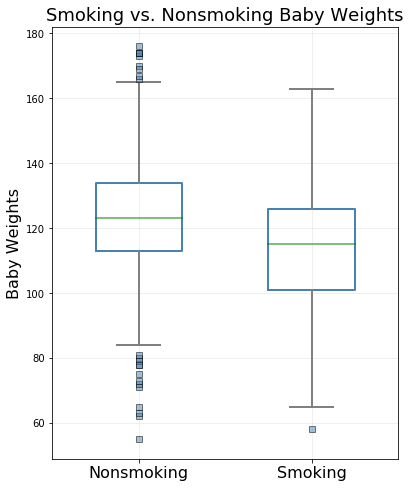

In [12]:
fig, ax = plt.subplots(figsize=(6,8))

bp = dfBabies.loc[(dfBabies["smoke"] == 0) | (dfBabies["smoke"] == 1)].boxplot(
    column = ["bwt"], by = "smoke", ax = ax, widths = [.5, .5], return_type = "dict")

for column in bp:

    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)

    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

ax.set_title('Smoking vs. Nonsmoking Baby Weights', fontsize=18)
ax.set_ylabel("Baby Weights", fontsize=16)

plt.xticks([1,2],["Nonsmoking", "Smoking"], rotation=0, fontsize=16)

plt.suptitle("")
ax.set_xlabel("")

ax.grid(alpha=0.25);

### Problem 6: Cleaning Election Results Data  
***

The file 2014\_election\_results.csv contains data from congressional district races during the 2014 midterm elections.  The problem is that the data is **extremely dirty**.  Your goal in the problem will be to use Pandas to clean the election result data and then, if possible, determine the names of the winners in each congressional district as well as the vote percentage margin that they won by.  Remember that data cleaning and wrangling is a messy business.  Don't be afraid to roll your sleeves up and get hacky!   

**Part A**: Complete the clean_election_data( ) function to return a clean DataFrame that accomplishes the following: 

- remove rows in the DataFrame that are missing values in columns **STATE**, **D**, and/or **GENERAL PERCENT**

<p> </p> 

- replace unknown names in **CANDIDATE NAME** with:  
    - the value from **CANDIDATE NAME (Last)**, if available
    - the string "UNKNOWN" if impossible to determine the full or last name 
    - **Note**: besides "NaN", data collectors appear to have used the string "Scattered" to indicate missing names as well
<p> </p> 
- convert the strings in **GENERAL PERCENT** to values of type float between $0$ and $100$ 
<p> </p> 
- restrict the DataFrame to only the columns **STATE**, **D**, **CANDIDATE NAME**, **GENERAL PERCENT**

In [16]:
def clean_election_data():
    #Reads in the dirty data
    df = pd.read_csv("2014_election_results.csv")
    
    #Drops any data missing these columns
    dfClean = df.dropna(subset=["STATE", "D", "GENERAL PERCENT"]).copy()
    
    #Start by replacing any instance of 'Scattered' with '' white space
    dfClean['CANDIDATE NAME (First)'] = dfClean['CANDIDATE NAME (First)'].str.replace('Scattered','')
    dfClean['CANDIDATE NAME (Last)'] = dfClean['CANDIDATE NAME (Last)'].str.replace('Scattered','')
    dfClean['CANDIDATE NAME'] = dfClean['CANDIDATE NAME'].str.replace('Scattered','')
    
    #Replace any white space with NaN, How to replace white space from stack overflow
    dfClean.replace(r'^\s*$', np.nan, regex = True, inplace = True)
    dfClean['CANDIDATE NAME'].fillna('', inplace = True)
    
    #Replace NaN with white space to make replaing easier
    dfClean['CANDIDATE NAME (First)'].replace(np.nan, ' ', regex = True, inplace = True)
    dfClean['CANDIDATE NAME (Last)'].replace(np.nan, ' ', regex = True, inplace = True)
    
    #Set CANDIDATE NAME to last name by default and replace any white space with UNKNOWN
    dfClean['CANDIDATE NAME'] = dfClean['CANDIDATE NAME (Last)']
    dfClean['CANDIDATE NAME'] = dfClean['CANDIDATE NAME'].str.replace(' ', 'UNKNOWN')
    
    #Removes the percent sign and replaces ',' withh '.' and converts the column to a numeric value
    dfClean['GENERAL PERCENT'] = dfClean['GENERAL PERCENT'].str.strip('%')
    dfClean['GENERAL PERCENT'] = dfClean['GENERAL PERCENT'].str.replace(',', '.')

    #Restricts the data to these columns only
    dfClean = dfClean[['STATE', 'D', 'CANDIDATE NAME', 'GENERAL PERCENT']]
    dfClean['GENERAL PERCENT'] = dfClean['GENERAL PERCENT'].astype(float)
    
    #display(dfClean)
    return dfClean
clean_election_data()

,STATE,D,CANDIDATE NAME,GENERAL PERCENT
0,Alabama,1,Byrne,68.16
1,Alabama,1,LeFlore,31.71
2,Alabama,1,UNKNOWN,0.13
5,Alabama,2,Roby,67.34
6,Alabama,2,Wright,32.56
7,Alabama,2,UNKNOWN,0.09
10,Alabama,3,Rogers,66.12
13,Alabama,3,Smith,33.72
14,Alabama,3,UNKNOWN,0.16
17,Alabama,4,Aderholt,98.57


**Part B**: Complete the function winners_and_margins( ) that takes in your clean DataFrame from **Part A** and returns a DataFrame with one row per state-district pair and with columns **STATE**, **D**, **WINNER**, and **MARGIN** where

- **STATE** and **D** are as defined in the original DataFrame 
<p> </p> 
- **WINNER** is the name of the candidate that had the largest general vote percentage (which may possibly be "UNKNOWN")
<p> </p> 
- **MARGIN** is the difference between the winning general vote percentage and the second highest vote percentage.  If there is only one candidate in a particular district you should list the general vote percentage obtained by the sole candidate. 

<p> </p> 

Finally, your DataFrame should be **sorted from most contentious races to least contentious** (i.e. from smallest winning margin to the largest). 

As the table shows, the data has now been reorganized to show winners and their margin, sorted from 0-100 (Collaborated with Kelsey Adams and Andrew Fay again here)

In [18]:
def winners_and_margins(df):    
    
    #Gets top two in order to get the margins
    toptwo = df.groupby(['STATE' , 'D']).head(2)        
    min_max = toptwo.groupby(['STATE', 'D'])['GENERAL PERCENT'].agg(['min', 'max']).reset_index()  
    
    # print(minmax)    
    margin = (min_max['max']-min_max['min'])    
    
    #print(margin)       
    top = df.groupby(['STATE','D'])['GENERAL PERCENT'].transform(max) == df['GENERAL PERCENT']
    dfWinners = df[top]    
    
    #Removes the general percent
    del dfWinners['GENERAL PERCENT']    
    
    #Adds the margins then sorts accordingly
    dfWinners['MARGIN'] = margin        
    dfWinners = dfWinners.sort_values('MARGIN')            
    dfWinners.rename(columns={'CANDIDATE NAME' : 'WINNER'},inplace =True)
    
    dfWinners['MARGIN'] = dfWinners['MARGIN'].fillna(100.0)
    
    return dfWinners
winners_and_margins(clean_election_data())


/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,STATE,D,WINNER,MARGIN
119,Arizona,7,Gallego,0.00
114,Arizona,6,Schweikert,0.00
10,Alabama,3,Rogers,0.07
378,California,38,Sanchez,2.10
402,California,44,Hahn,5.11
179,California,2,Huffman,5.20
227,California,12,Pelosi,6.63
197,California,7,Bera,6.86
133,Arizona,8,Franks,6.92
139,Arizona,9,Sinema,10.93


### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_, authors Darrell Huff and Irving Geis describe some common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. **If you come up with something that you're proud of then please post it to Piazza!**